# 1. Source Data

1. Sumber dataset : Kaggle.com
2. Link dataset : https://www.kaggle.com/datasets/hendratno/covid19-indonesia
3. Penjelasan dataset : Dataset ini merupakan dataset Covid-19 di Indonesia untuk membantu dalam mengambil sebuah keputusan terkait covid-19.

# 2. Load Library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# 3. Load Data dan Eksplorasi Data

In [10]:
data_covid = pd.read_csv(
    "https://raw.githubusercontent.com/asepsr37/data-and-machine-learning/main/clustering/covid-19/resource/covid_19_indonesia_time_series_all.csv"
)


In [ ]:
# Mengetahui Jumlah baris dan kolom
jumlah_baris, jumlah_kolom = data_covid.shape
print("Jumlah baris adalah ", jumlah_baris)
print("Jumlah kolom adalah ", jumlah_kolom)

Jumlah baris adalah  31822
Jumlah kolom adalah  38


In [ ]:
data_covid.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [ ]:
# Mengetahui tipe data
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
# Mengetahui Missing Value
data_covid.isnull().sum()

,0
Date,0
Location ISO Code,0
Location,0
New Cases,0
New Deaths,0
New Recovered,0
New Active Cases,0
Total Cases,0
Total Deaths,0
Total Recovered,0


In [ ]:
# Mengetahui data yang duplikat
data_covid.duplicated().sum()

np.int64(0)

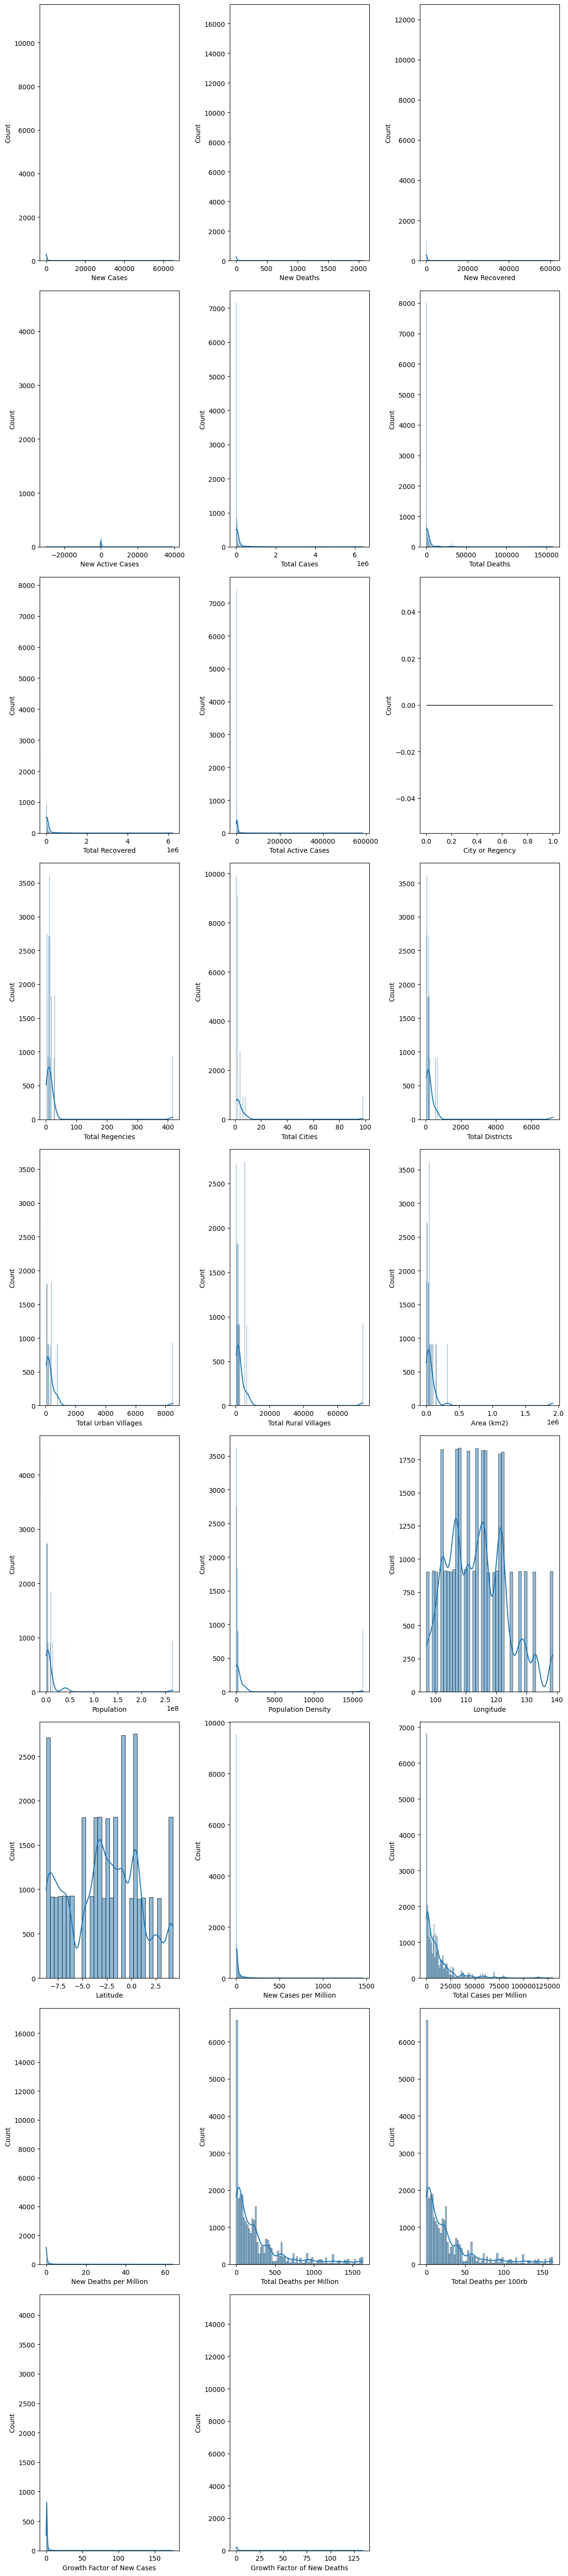

In [ ]:
# Melihat persebaran data
num_cols_numeric = len(kolom_numerik)
num_rows_numeric = math.ceil(num_cols_numeric / 3)

plt.figure(figsize=(12, 6 * num_rows_numeric))

for i, column in enumerate(kolom_numerik):
    plt.subplot(num_rows_numeric, 3, i + 1)
    sns.histplot(data=data_covid, x=column, kde=True)

plt.tight_layout()
plt.show()

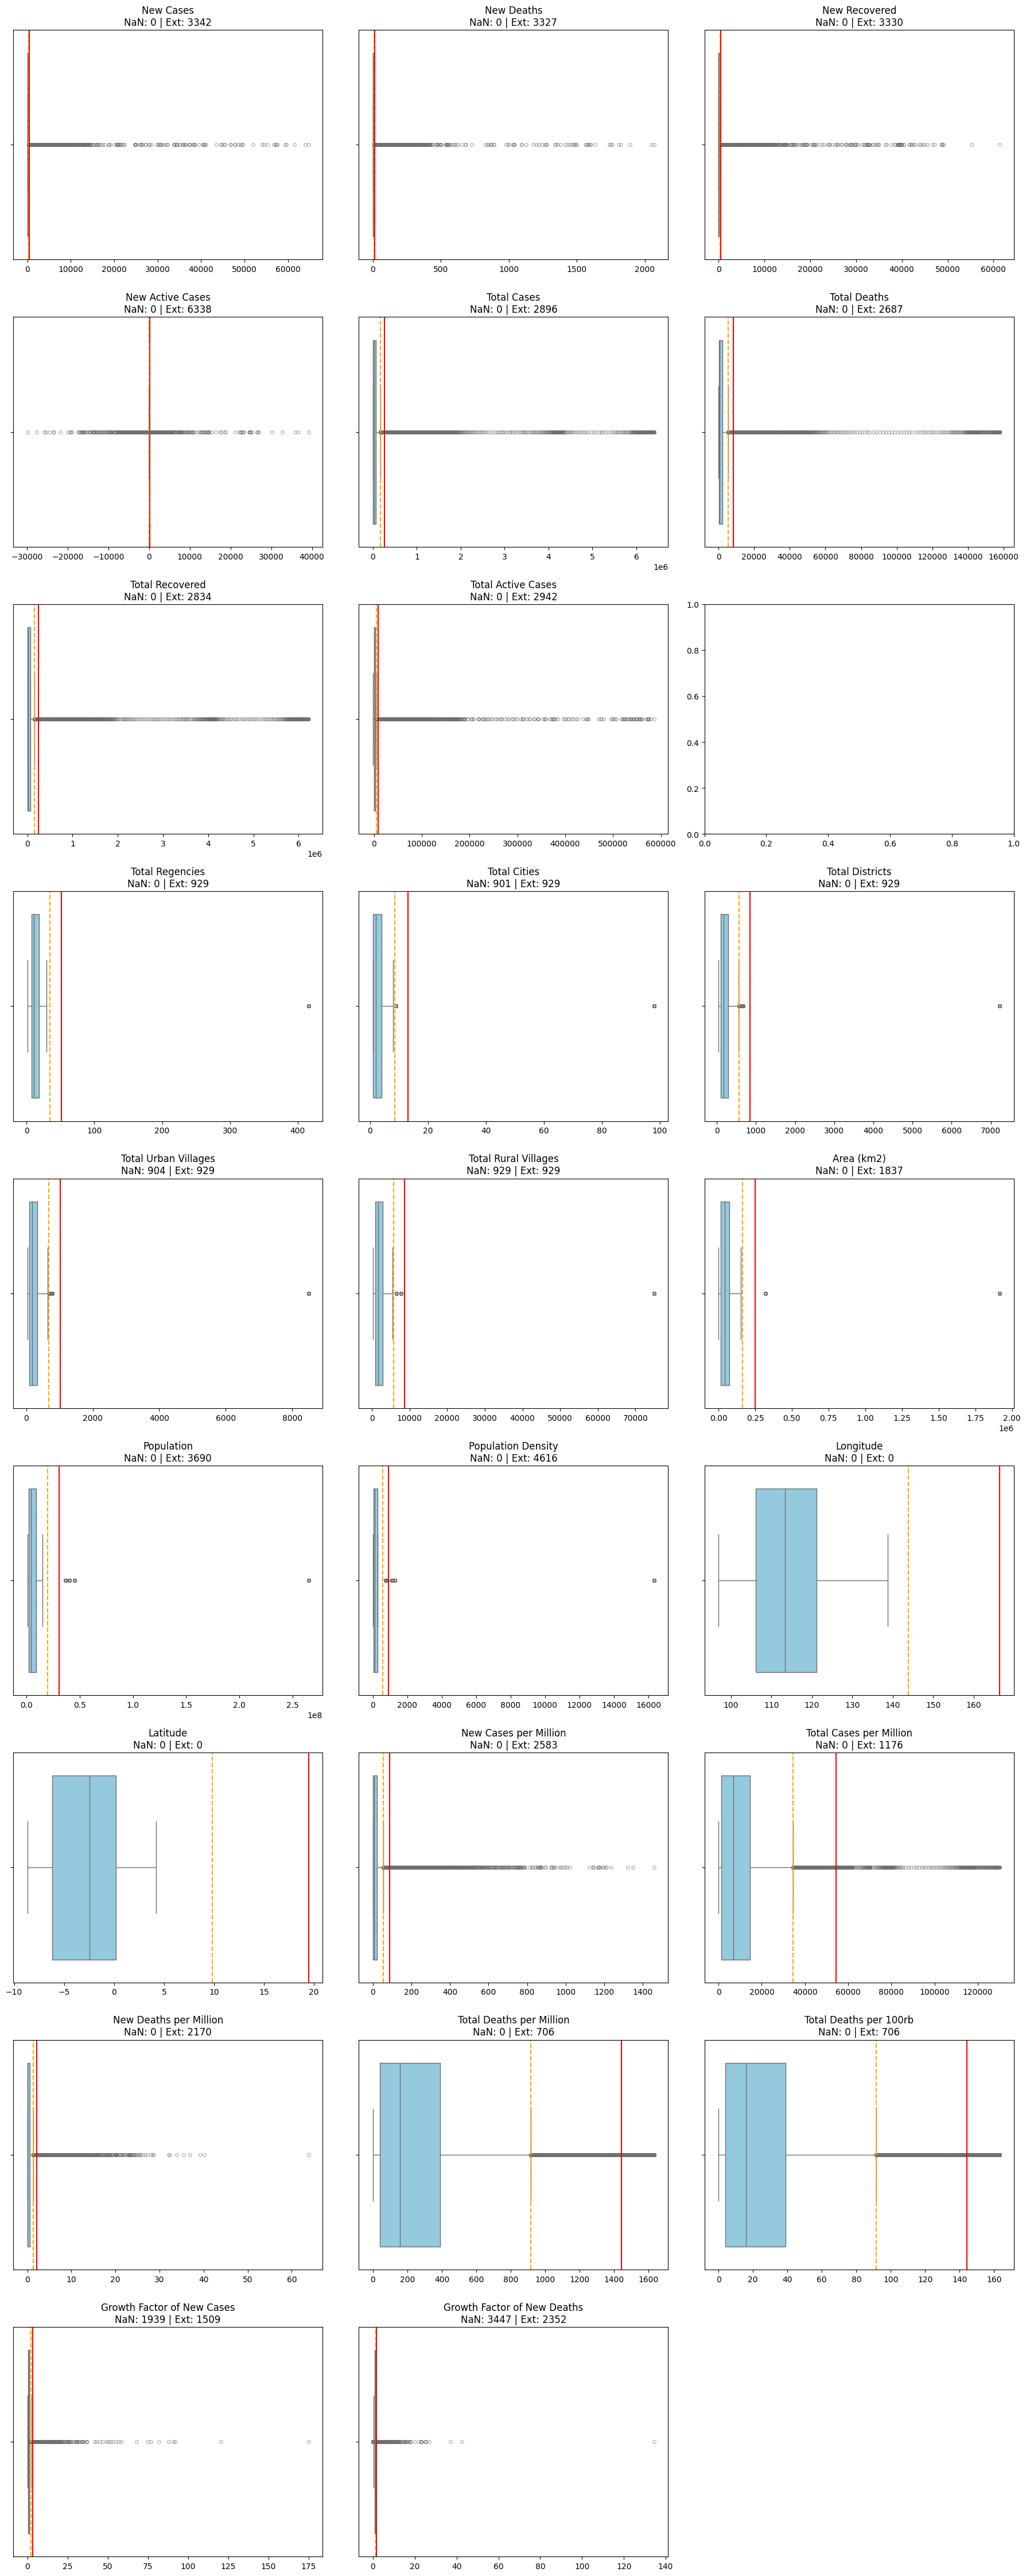

,Feature,Missing Values,Mild Outliers,Extreme Outliers,% Extreme (of non-null)
0,New Cases,0,1209,3342,10.50
1,New Deaths,0,1316,3327,10.46
2,New Recovered,0,1270,3330,10.46
3,New Active Cases,0,2503,6338,19.92
4,Total Cases,0,704,2896,9.10
5,Total Deaths,0,930,2687,8.44
6,Total Recovered,0,760,2834,8.91
7,Total Active Cases,0,1280,2942,9.25
8,Total Regencies,0,0,929,2.92
9,Total Cities,901,1839,929,3.00


In [ ]:
def plot_detailed_outliers_with_nan(df):
    # 1. Pilih hanya kolom numerik
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    outlier_summary = []

    for i, col in enumerate(numeric_cols):
        # Ambil data non-null hanya untuk perhitungan (tanpa menghapus di dataframe asli)
        clean_series = df[col].dropna()

        if clean_series.empty:
            continue

        # Hitung statistik IQR pada data yang tersedia
        Q1 = clean_series.quantile(0.25)
        Q3 = clean_series.quantile(0.75)
        IQR = Q3 - Q1

        mild_upper = Q3 + (1.5 * IQR)
        mild_lower = Q1 - (1.5 * IQR)
        ext_upper = Q3 + (3.0 * IQR)
        ext_lower = Q1 - (3.0 * IQR)

        # Hitung jumlah berdasarkan data non-null
        count_mild = clean_series[(clean_series > mild_upper) & (clean_series <= ext_upper) |
                                  (clean_series < mild_lower) & (clean_series >= ext_lower)].shape[0]
        count_ext = clean_series[(clean_series > ext_upper) | (clean_series < ext_lower)].shape[0]

        # Simpan summary dengan pembagi total data non-null agar persentase akurat
        outlier_summary.append({
            'Feature': col,
            'Missing Values': df[col].isna().sum(),
            'Mild Outliers': count_mild,
            'Extreme Outliers': count_ext,
            '% Extreme (of non-null)': round((count_ext / len(clean_series)) * 100, 2)
        })

        # Visualisasi (Seaborn otomatis mengabaikan NaN)
        sns.boxplot(x=df[col], ax=axes[i], color='skyblue', flierprops={"marker": "o", "markersize": 4, "alpha": 0.5})

        axes[i].axvline(mild_upper, color='orange', linestyle='--', label='Mild Fence' if i==0 else "")
        axes[i].axvline(ext_upper, color='red', linestyle='-', label='Extreme Fence' if i==0 else "")

        axes[i].set_title(f"{col}\nNaN: {df[col].isna().sum()} | Ext: {count_ext}", fontsize=12)
        axes[i].set_xlabel("")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(outlier_summary)

# Penggunaan
summary_df = plot_detailed_outliers_with_nan(data_covid)
summary_df

/tmp/ipython-input-1783062618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_covid[col], order=data_covid[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1783062618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_covid[col], order=data_covid[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1783062618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_covid[col], order=data_covid[col].value_counts().index, palette='viridis')


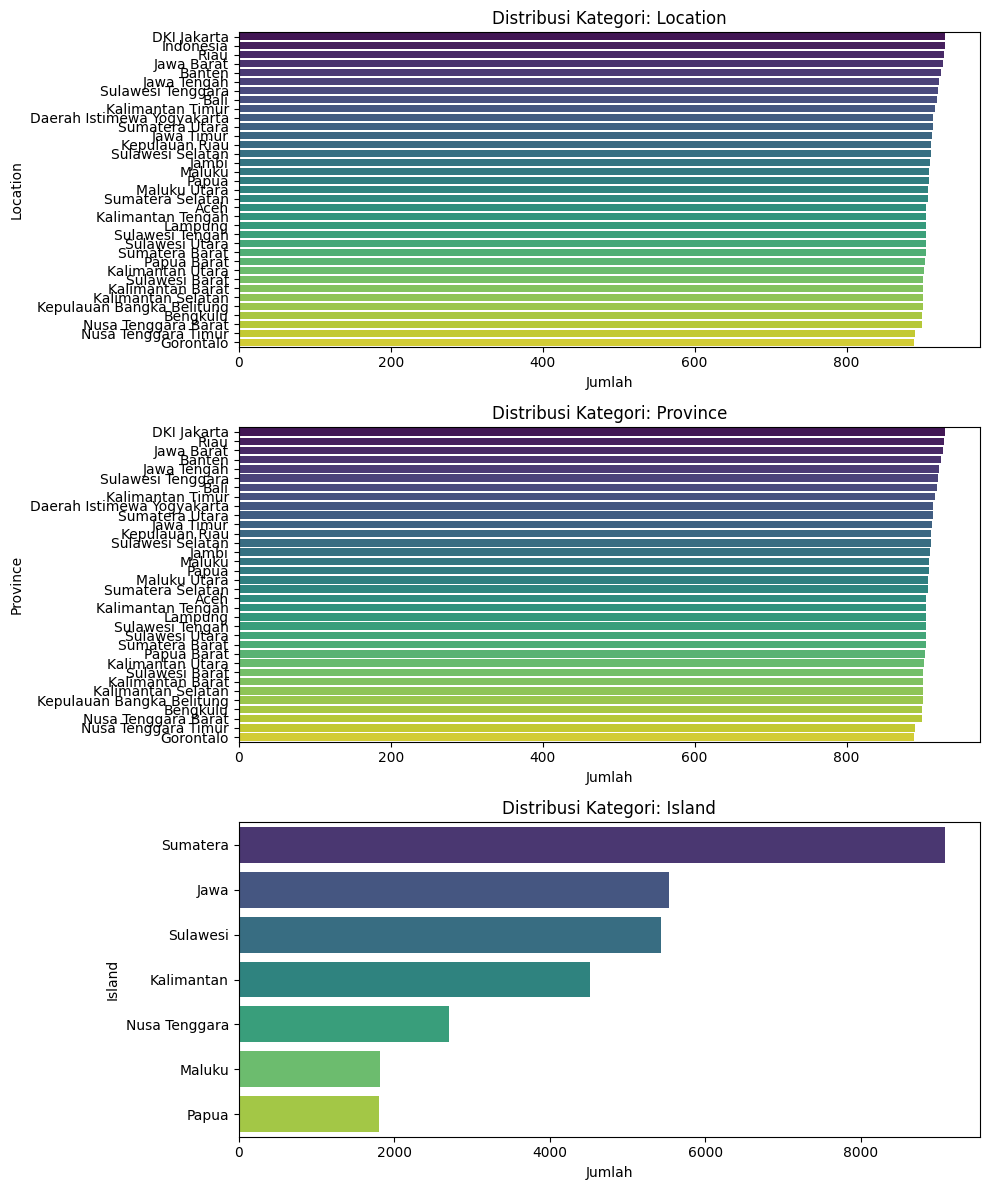

In [ ]:
# Melihat distribusi data pada kolom bertipe data kategorikal
categorical_columns = ['Location', 'Province', 'Island']
plt.figure(figsize=(10, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(y=data_covid[col], order=data_covid[col].value_counts().index, palette='viridis')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xlabel('Jumlah')

plt.tight_layout()
plt.show()

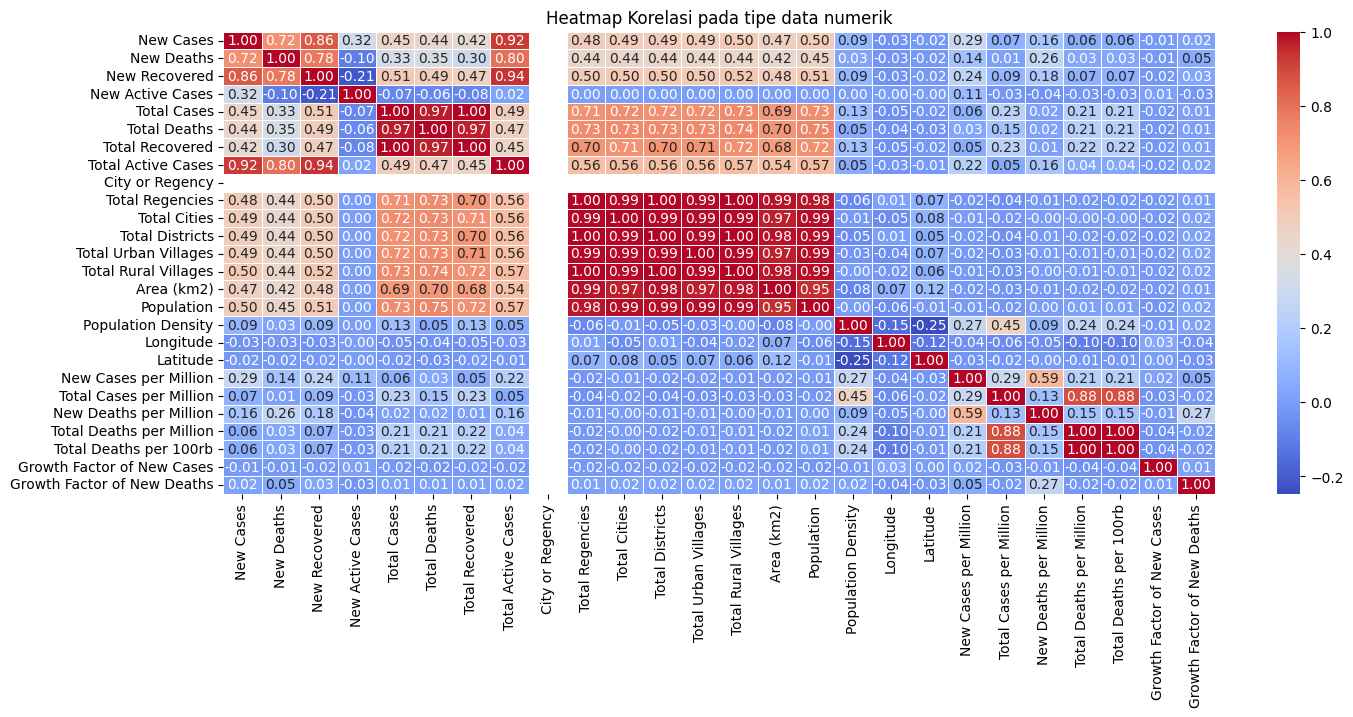

In [ ]:
kolom_numerik = data_covid.select_dtypes(include=['number'])
plt.figure(figsize=(16, 6))
sns.heatmap(kolom_numerik.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi pada tipe data numerik")
plt.show()

# 4. Membersihkan Data

In [ ]:
# Menghapus Kolom yang tidak perlu digunakan
kolom_dihapus = [
    'Date', 'Location ISO Code', 'Location', 'Location Level', 'Country',
    'Continent', 'Time Zone', 'Special Status', 'City or Regency',
    'Total Regencies', 'Total Cities', 'Total Districts',
    'Total Urban Villages', 'Total Rural Villages', 'Area (km2)',
    'Longitude', 'Latitude','Population Density',
    'Total Deaths per 100rb'
]
data_covid = data_covid.drop(columns=kolom_dihapus)

1. Identitas & Metadata (Hapus dari Model):
- Date, Location ISO Code, Location, Location Level, Country, Continent, Time Zone, Special Status.
- Alasan: Ini adalah data administratif/teks yang tidak bisa dihitung jaraknya oleh algoritma K-Means atau PCA.

2. Informasi Geografis Statis (Hapus):
- City or Regency, Total Regencies, Total Cities, Total Districts, Total Urban Villages, Total Rural Villages, Area (km2), Longitude, Latitude.
- Alasan: Kolom-kolom ini menjelaskan struktur wilayah, bukan tingkat keparahan virus secara langsung.

3. Redundansi Data Absolut (Hapus):
- Population Density.
- Alasan: Data absolut sangat dipengaruhi oleh jumlah penduduk (Provinsi besar pasti memiliki kasus lebih banyak). Untuk pemetaan tingkat risiko yang adil, kita lebih membutuhkan data Relatif (seperti "per Million"). Selain itu, Population sudah terwakili dalam perhitungan fitur "per Million".

4. Redundansi Skala (Hapus):
- Total Deaths per 100rb.
- Alasan: Ini redundan dengan Total Deaths per Million (hanya beda skala faktor 10).

In [ ]:
# Menghapus Missing Value
data_covid = data_covid.dropna()

In [ ]:
# Menghapus duplikat
data_covid = data_covid.drop_duplicates()

In [ ]:
# Ubah nilai data menjadi float
kolom_rate = ['Case Fatality Rate', 'Case Recovered Rate']

for col in kolom_rate:
    data_covid[col] = (
        data_covid[col]
        .str.replace('%', '', regex=False)
        .str.replace(',', '.', regex=False)
    )
    data_covid[col] = pd.to_numeric(data_covid[col], errors='coerce')

# Ganti nama kolom, tambahkan (%)
data_covid.rename(columns={
    'Case Fatality Rate': 'Case Fatality Rate (%)',
    'Case Recovered Rate': 'Case Recovered Rate (%)'
}, inplace=True)


In [ ]:
def apply_log_transformation(df):
    """
    1. Mengidentifikasi kolom numerik
    2. Menerapkan Log Transformation (log1p) pada kolom yang valid.
    """
    # 1. Identifikasi kolom numerik
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # 2. Buat copy dataframe agar data asli tidak berubah
    df_log = df.copy()

    # 3. Proses Transformasi Log
    for col in numeric_cols:
        # Cek apakah kolom memiliki nilai negatif (Log tidak bisa untuk nilai <= -1)
        if (df_log[col] < 0).any():
            print(f"Peringatan: Kolom '{col}' mengandung nilai negatif. Log transformasi dilewati.")
            continue

        # 4. Terapkan log(x+1)
        # np.log1p(NaN) akan tetap menghasilkan NaN secara otomatis
        df_log[col] = np.log1p(df_log[col])

    return df_log

# apply
data_covid_log = apply_log_transformation(data_covid)

# Cek hasil
print(f"Ukuran dataset (baris tetap sama): {data_covid_log.shape}")
display(data_covid_log.head())

Peringatan: Kolom 'New Active Cases' mengandung nilai negatif. Log transformasi dilewati.
Peringatan: Kolom 'Total Active Cases' mengandung nilai negatif. Log transformasi dilewati.
Ukuran dataset (baris tetap sama): (24880, 19)


,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province,Island,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate (%),Case Recovered Rate (%),Growth Factor of New Cases,Growth Factor of New Deaths
1,1.098612,0.0,0.0,2,3.737670,3.044522,4.330733,-54,DKI Jakarta,Jawa,16.199320,0.165514,1.564441,0.0,1.043804,3.907613,5.214555,0.693147,0.693147
4,1.098612,0.0,0.0,2,3.784190,3.044522,4.330733,-52,DKI Jakarta,Jawa,16.199320,0.165514,1.601406,0.0,1.043804,3.860940,5.167183,0.693147,0.693147
7,0.000000,0.0,0.0,0,0.693147,0.000000,0.693147,0,Riau,Sumatera,15.619545,0.000000,0.148420,0.0,0.000000,0.000000,4.615121,0.000000,0.693147
8,1.098612,0.0,0.0,2,3.828641,3.044522,4.330733,-50,DKI Jakarta,Jawa,16.199320,0.165514,1.638997,0.0,1.043804,3.816393,5.121998,0.693147,0.693147
10,0.693147,0.0,0.0,1,1.098612,0.693147,4.110874,-59,Jawa Barat,Jawa,17.625752,0.019803,0.039221,0.0,0.019803,3.931826,8.006701,0.693147,0.000000


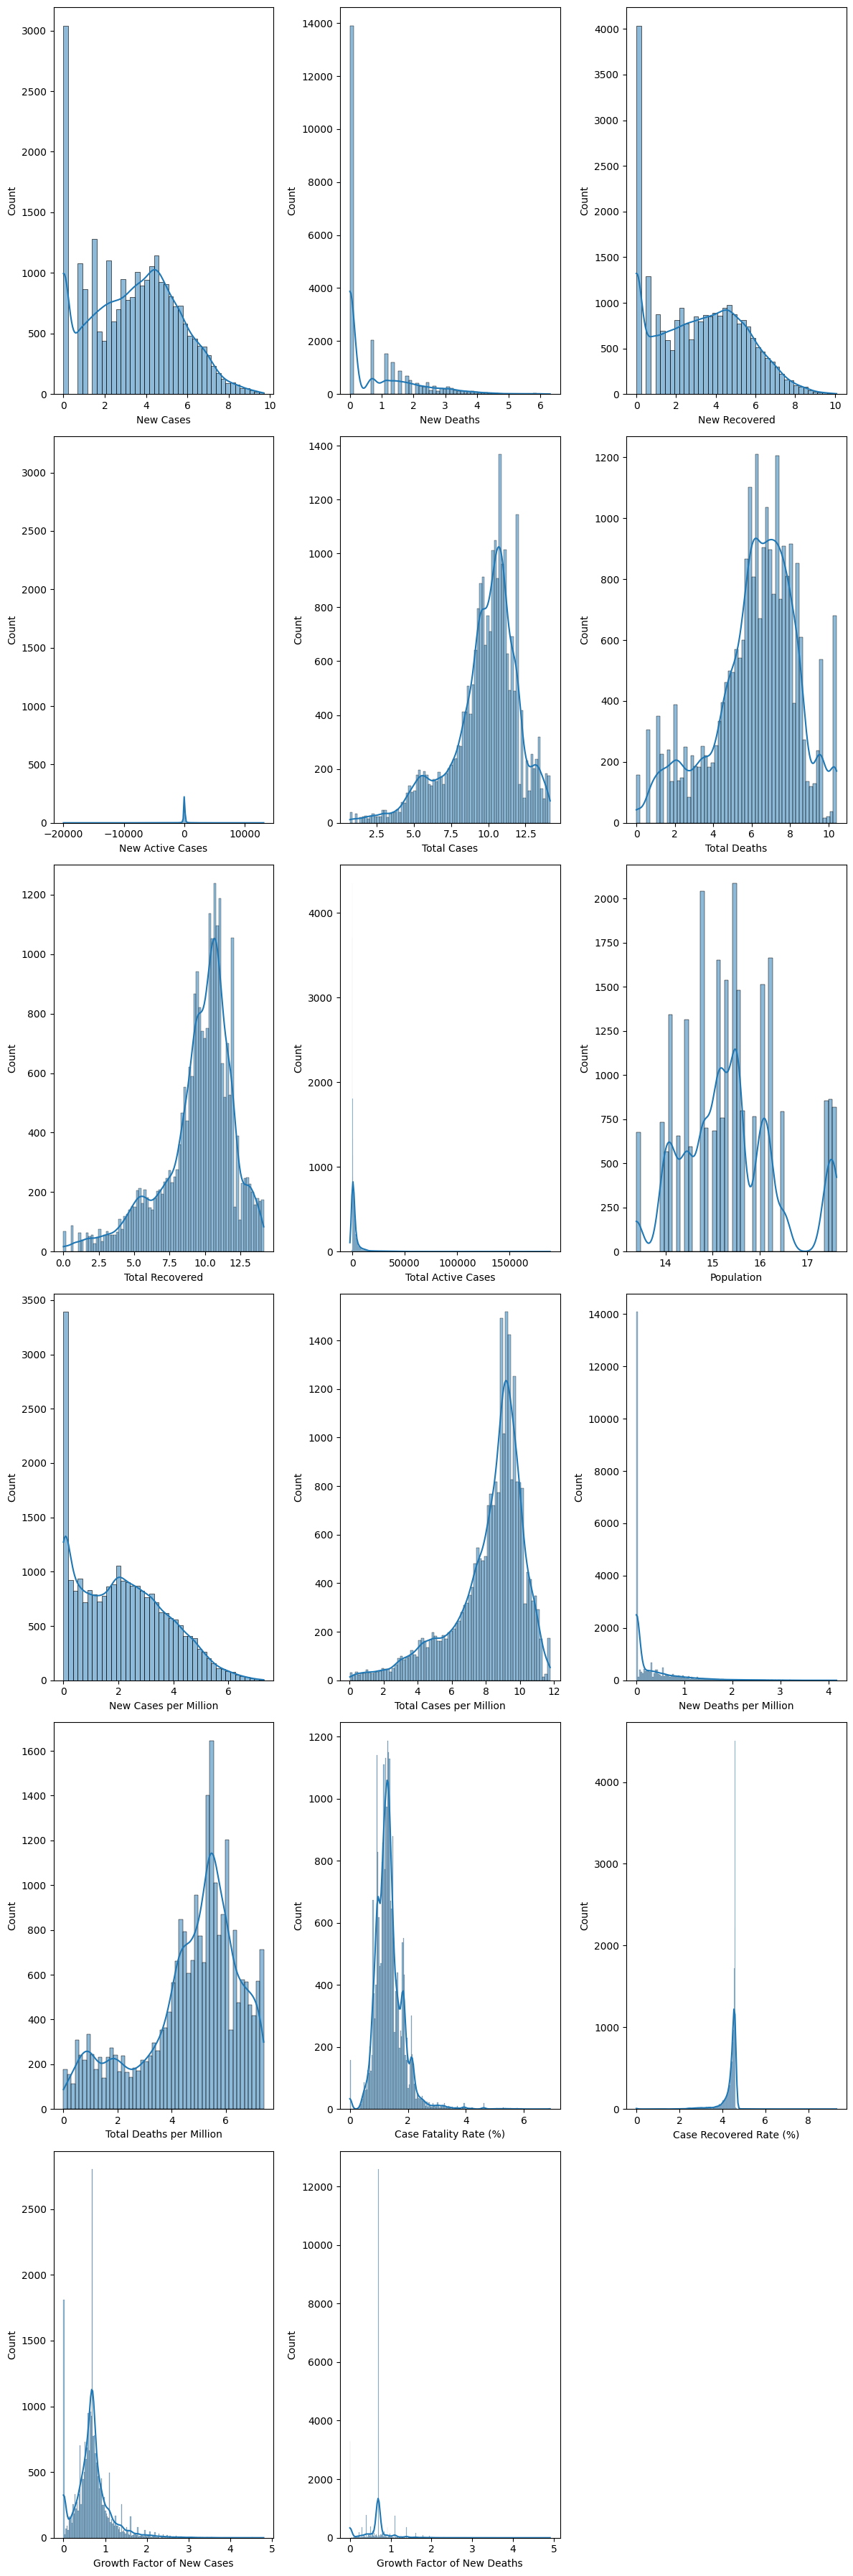

In [ ]:
# Melihat persebaran data
kolom_numerik = data_covid_log.select_dtypes(include=[np.number]).columns
num_cols_numeric = len(kolom_numerik)
num_rows_numeric = math.ceil(num_cols_numeric / 3)

plt.figure(figsize=(12, 6 * num_rows_numeric))

for i, column in enumerate(kolom_numerik):
    plt.subplot(num_rows_numeric, 3, i + 1)
    sns.histplot(data=data_covid_log, x=column, kde=True)

plt.tight_layout()
plt.show()

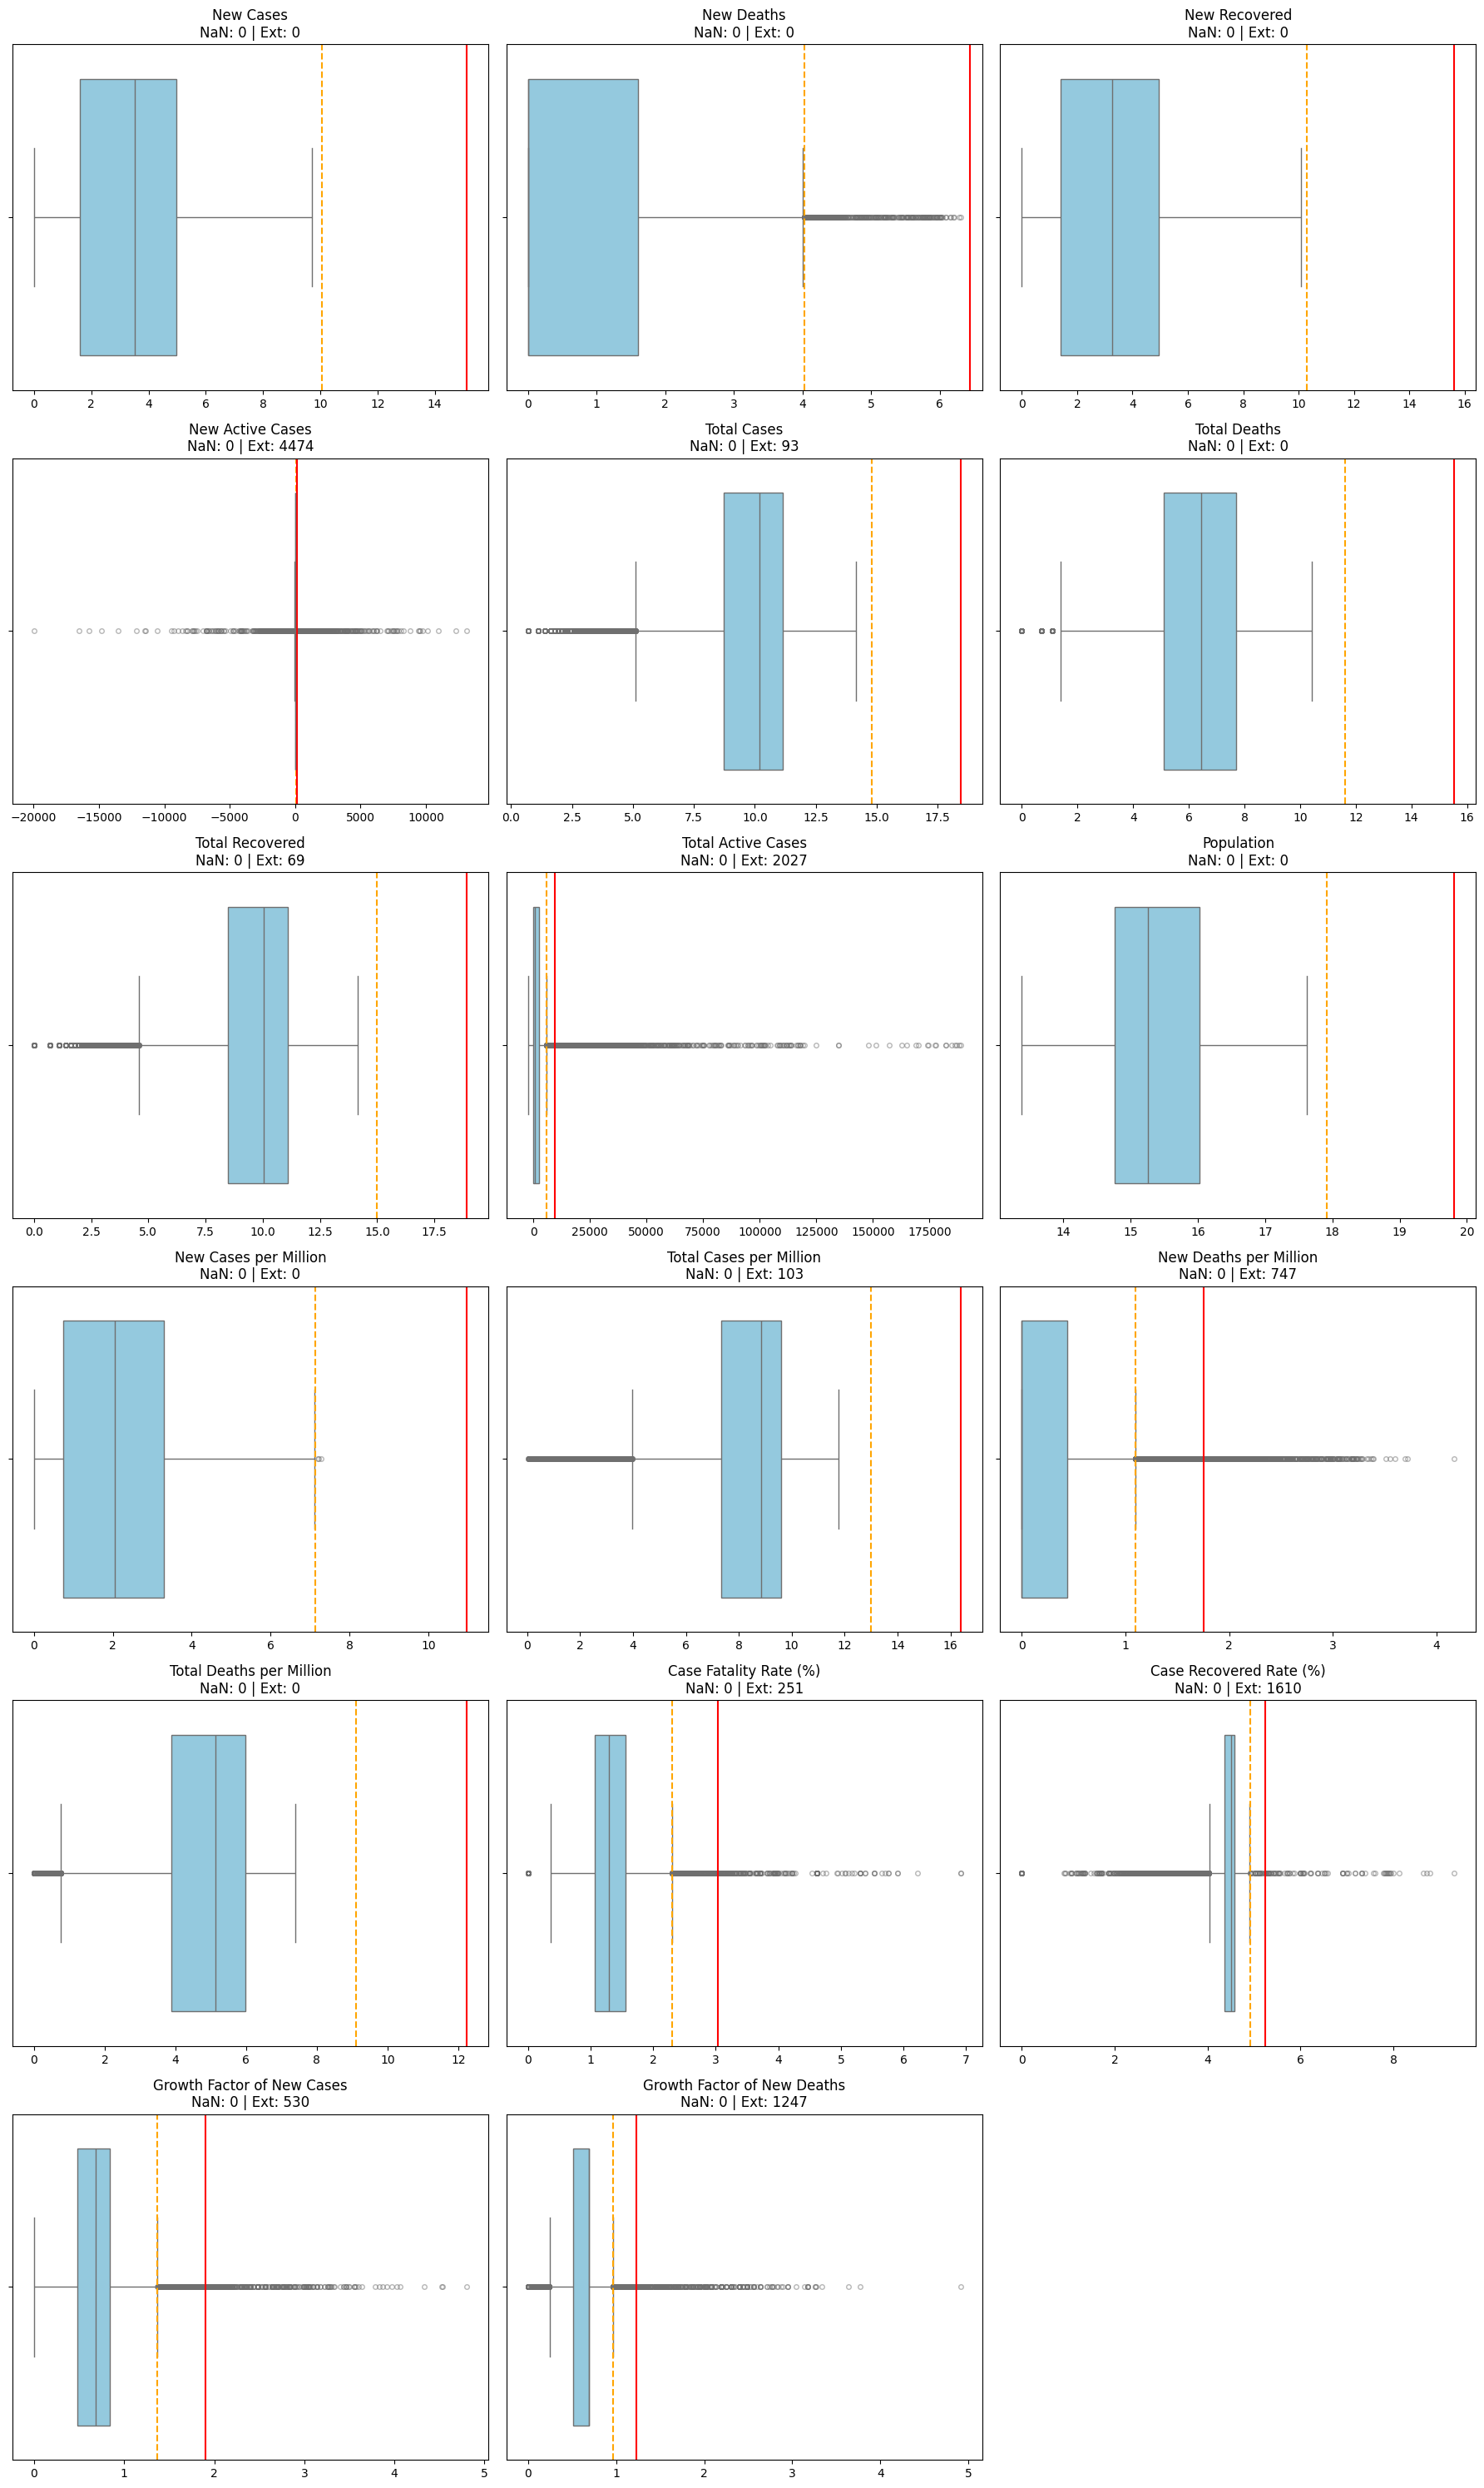

                        Feature  Missing Values  Mild Outliers  \
0                     New Cases               0              0   
1                    New Deaths               0            460   
2                 New Recovered               0              0   
3              New Active Cases               0           2091   
4                   Total Cases               0           1119   
5                  Total Deaths               0            814   
6               Total Recovered               0           1318   
7            Total Active Cases               0           1080   
8                    Population               0              0   
9         New Cases per Million               0              3   
10      Total Cases per Million               0           1313   
11       New Deaths per Million               0           1349   
12     Total Deaths per Million               0           1023   
13       Case Fatality Rate (%)               0            646   
14      Ca

In [ ]:
def plot_detailed_outliers_with_nan(df):
    # 1. Pilih hanya kolom numerik
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    outlier_summary = []

    for i, col in enumerate(numeric_cols):
        # Ambil data non-null hanya untuk perhitungan (tanpa menghapus di dataframe asli)
        clean_series = df[col].dropna()

        if clean_series.empty:
            continue

        # Hitung statistik IQR pada data yang tersedia
        Q1 = clean_series.quantile(0.25)
        Q3 = clean_series.quantile(0.75)
        IQR = Q3 - Q1

        mild_upper = Q3 + (1.5 * IQR)
        mild_lower = Q1 - (1.5 * IQR)
        ext_upper = Q3 + (3.0 * IQR)
        ext_lower = Q1 - (3.0 * IQR)

        # Hitung jumlah berdasarkan data non-null
        count_mild = clean_series[(clean_series > mild_upper) & (clean_series <= ext_upper) |
                                  (clean_series < mild_lower) & (clean_series >= ext_lower)].shape[0]
        count_ext = clean_series[(clean_series > ext_upper) | (clean_series < ext_lower)].shape[0]

        # Simpan summary dengan pembagi total data non-null agar persentase akurat
        outlier_summary.append({
            'Feature': col,
            'Missing Values': df[col].isna().sum(),
            'Mild Outliers': count_mild,
            'Extreme Outliers': count_ext,
            '% Extreme (of non-null)': round((count_ext / len(clean_series)) * 100, 2)
        })

        # Visualisasi (Seaborn otomatis mengabaikan NaN)
        sns.boxplot(x=df[col], ax=axes[i], color='skyblue', flierprops={"marker": "o", "markersize": 4, "alpha": 0.5})

        axes[i].axvline(mild_upper, color='orange', linestyle='--', label='Mild Fence' if i==0 else "")
        axes[i].axvline(ext_upper, color='red', linestyle='-', label='Extreme Fence' if i==0 else "")

        axes[i].set_title(f"{col}\nNaN: {df[col].isna().sum()} | Ext: {count_ext}", fontsize=12)
        axes[i].set_xlabel("")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(outlier_summary)

# Penggunaan
summary_df = plot_detailed_outliers_with_nan(data_covid_log)
print(summary_df)

Dalam  menangani outliers menggunakan log transformation, kondisi distrubsi data cenderung normal walauppun dibeberapa data tidak normal. Lalu, setelah dicek menggunakan boxplot di beberapa kolom seperti pada New Actives Cases dan total active cases mmemiliki outliers yang tinggi juga. Namun, akan dilakukan robust scaling untuk menangani outliers tersebut

In [ ]:
data_covid_log

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province,Island,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate (%),Case Recovered Rate (%),Growth Factor of New Cases,Growth Factor of New Deaths
1,1.098612,0.0,0.000000,2,3.737670,3.044522,4.330733,-54,DKI Jakarta,Jawa,16.199320,0.165514,1.564441,0.0,1.043804,3.907613,5.214555,0.693147,0.693147
4,1.098612,0.0,0.000000,2,3.784190,3.044522,4.330733,-52,DKI Jakarta,Jawa,16.199320,0.165514,1.601406,0.0,1.043804,3.860940,5.167183,0.693147,0.693147
7,0.000000,0.0,0.000000,0,0.693147,0.000000,0.693147,0,Riau,Sumatera,15.619545,0.000000,0.148420,0.0,0.000000,0.000000,4.615121,0.000000,0.693147
8,1.098612,0.0,0.000000,2,3.828641,3.044522,4.330733,-50,DKI Jakarta,Jawa,16.199320,0.165514,1.638997,0.0,1.043804,3.816393,5.121998,0.693147,0.693147
10,0.693147,0.0,0.000000,1,1.098612,0.693147,4.110874,-59,Jawa Barat,Jawa,17.625752,0.019803,0.039221,0.0,0.019803,3.931826,8.006701,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31815,2.564949,0.0,0.000000,12,11.020267,7.458186,10.989977,90,Sulawesi Tengah,Sulawesi,14.899201,1.621366,9.936608,0.0,6.375621,1.345472,4.585172,1.223775,0.693147
31817,3.637586,0.0,0.000000,37,10.873717,7.101676,10.839542,560,Sulawesi Utara,Sulawesi,14.787003,2.708717,9.902256,0.0,6.131531,1.193922,4.581287,1.348073,0.693147
31818,2.639057,0.0,1.386294,10,11.558291,7.771489,11.533385,203,Sumatera Barat,Sumatera,15.523752,1.211941,9.850093,0.0,6.065156,1.184790,4.590463,2.014903,0.693147
31819,2.833213,0.0,0.693147,15,11.316898,8.124743,11.270994,312,Sumatera Selatan,Sumatera,15.921783,1.081805,9.210714,0.0,6.020611,1.631199,4.569647,1.435085,0.693147


In [ ]:

# 1. Memisahkan fitur kategorikal (Province & Island)
#  karena Fitur ini tidak masuk ke PCA/Clustering
df_metadata = data_covid_log[['Province', 'Island']].copy()

# 2. Ambil hanya kolom numerik untuk pemodelan
df_numeric = data_covid_log.select_dtypes(include=['number']).copy()

# 3. Inisialisasi RobustScaler
scaler = RobustScaler()

# 4. Fit dan Transform pada data numerik
# RobustScaler akan menghitung median dan IQR untuk setiap kolom
scaled_data = scaler.fit_transform(df_numeric)

# 5. Kembalikan ke format DataFrame agar nama kolom tetap terjaga
df_scaled = pd.DataFrame(scaled_data, columns=df_numeric.columns)

In [ ]:
df_scaled

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate (%),Case Recovered Rate (%),Growth Factor of New Cases,Growth Factor of New Deaths
0,-0.719510,0.0,-0.914562,0.054054,-2.663624,-1.304218,-2.198342,-0.313785,0.747669,-0.732888,-3.227290,0.0,-1.960239,5.280898,3.201506,0.028325,0.000000
1,-0.719510,0.0,-0.914562,0.054054,-2.644436,-1.304218,-2.198342,-0.312924,0.747669,-0.732888,-3.210916,0.0,-1.960239,5.186567,2.985697,0.028325,0.000000
2,-1.045105,0.0,-0.914562,0.000000,-3.919354,-2.468691,-3.594515,-0.290541,0.288902,-0.797626,-3.854532,0.0,-2.460334,-2.616770,0.470719,-1.925185,0.000000
3,-0.719510,0.0,-0.914562,0.054054,-2.626102,-1.304218,-2.198342,-0.312063,0.747669,-0.732888,-3.194265,0.0,-1.960239,5.096533,2.779850,0.028325,0.000000
4,-0.839677,0.0,-0.914562,0.027027,-3.752118,-2.203575,-2.282728,-0.315937,1.876379,-0.789881,-3.902903,0.0,-2.450847,5.329834,15.921414,0.028325,-3.843908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24875,-0.284933,0.0,-0.914562,0.324324,0.340124,0.383925,0.357599,-0.251802,-0.281093,-0.163456,0.481255,0.0,0.594277,0.102561,0.334283,1.523805,0.000000
24876,0.032964,0.0,-0.914562,1.000000,0.279679,0.247566,0.299860,-0.049500,-0.369873,0.261843,0.466039,0.0,0.477331,-0.203736,0.316588,1.874116,0.000000
24877,-0.262969,0.0,-0.525423,0.270270,0.562035,0.503757,0.566169,-0.203164,0.213103,-0.323596,0.442932,0.0,0.445531,-0.222194,0.358387,3.753455,0.000000
24878,-0.205428,0.0,-0.719993,0.405405,0.462472,0.638870,0.465459,-0.156247,0.528058,-0.374496,0.159713,0.0,0.424188,0.680043,0.263558,2.119342,0.000000


# 5. Modelling


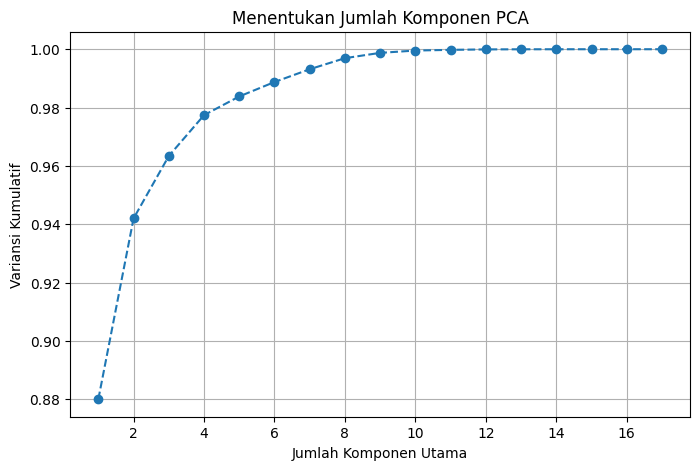

In [ ]:
# Selection Feature menggunakan PCA
pca = PCA()
pca.fit(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Variansi Kumulatif')
plt.title('Menentukan Jumlah Komponen PCA')
plt.grid()
plt.show()

PCA (Principal Component Analysis) adalah teknik statistik untuk reduksi dimensi data. Tujuannya adalah:

- Menyederhanakan data kompleks - mengubah banyak variabel yang saling berkorelasi menjadi variabel baru (komponen utama) yang tidak berkorelasi
- Menangkap variasi maksimal - komponen pertama menangkap variasi terbesar, komponen kedua variasi terbesar berikutnya, dan seterusnya
- Mengurangi dimensi - dari 15 kolom bisa diringkas menjadi lebih sedikit tanpa kehilangan banyak informasi

- Sumbu X: Jumlah komponen utama (dari 1 hingga 15)
- Sumbu Y: Variansi kumulatif (proporsi total variasi data yang dijelaskan)

Analisis Kurva:

- Sumbu X: Jumlah komponen utama (dari 1 hingga 15)
- Sumbu Y: Variansi kumulatif (proporsi total variasi data yang dijelaskan)

1. Komponen 1-5: Kurva naik tajam

    - 5 komponen pertama sudah menjelaskan ~75-80% variasi data


2. Komponen 6-8: Kurva mulai landai

    - 8 komponen menjelaskan ~90% variasi


3. Komponen 9-15: Kurva hampir datar

    - Komponen tambahan hanya menambah sedikit informasi

Rekomendasi:
Berdasarkan grafik, maka ggunakan 5-8 komponen utama karena:

- Menangkap 80-90% informasi dari data asli
- Mengurangi dimensi dari 15 menjadi 5-8 (reduksi ~50-70%)
- Titik "elbow" (siku) berada di sekitar komponen 5-8

In [ ]:
def run_pca_analysis(df_input, n_pca):
    """
    Input: Dataframe hasil scaling, jumlah komponen PCA
    Output: Dataframe hasil PCA (siap untuk clustering)
    """
    # Tahap PCA
    pca = PCA(n_components=n_pca)
    pca_data = pca.fit_transform(df_input)
    pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(n_pca)])

    # Analisis Silhouette untuk mencari k-optimal
    scores = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(pca_df)
        scores.append(silhouette_score(pca_df, labels))

    # Visualisasi
    plt.figure(figsize=(8, 4))
    plt.plot(k_range, scores, marker='o', linestyle='--', color='teal')
    plt.title(f'Analisis Silhouette Score (PCA: {n_pca})')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()

    return pca_df

def run_final_clustering(pca_df, k_final):
    """
    Input: Dataframe hasil PCA, jumlah cluster pilihan
    Output: Dataframe dengan kolom cluster & nilai silhouette score
    """
    # Copy agar data PCA asli tidak berubah
    df_result = pca_df.copy()

    # Pemodelan K-Means
    kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
    df_result['Cluster'] = kmeans.fit_predict(df_result)

    # Hitung Score (hanya pada fitur PC, kolom Cluster tidak dihitung)
    score = silhouette_score(pca_df, df_result['Cluster'])

    print(f"--- Evaluasi Model Akhir ---")
    print(f"Jumlah Cluster: {k_final}")
    print(f"Silhouette Score: {score:.4f}\n")

    return df_result, score

## PCA 5

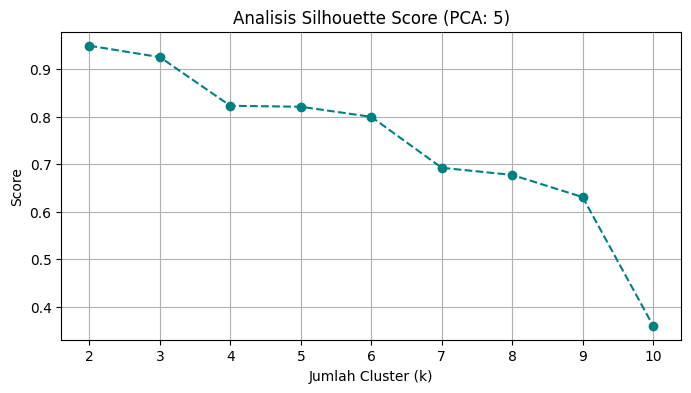

In [ ]:
pca_df_5 = run_pca_analysis(df_scaled, n_pca=5)

In [ ]:
# grafik k=2 terlihat paling optimal
final_model_5_2, score_5_2 = run_final_clustering(pca_df_5, k_final=2)

# mencoba k=3
final_model_5_3, score_5_3 = run_final_clustering(pca_df_5, k_final=3)

--- Evaluasi Model Akhir ---
Jumlah Cluster: 2
Silhouette Score: 0.9491

--- Evaluasi Model Akhir ---
Jumlah Cluster: 3
Silhouette Score: 0.9250



## PCA 6

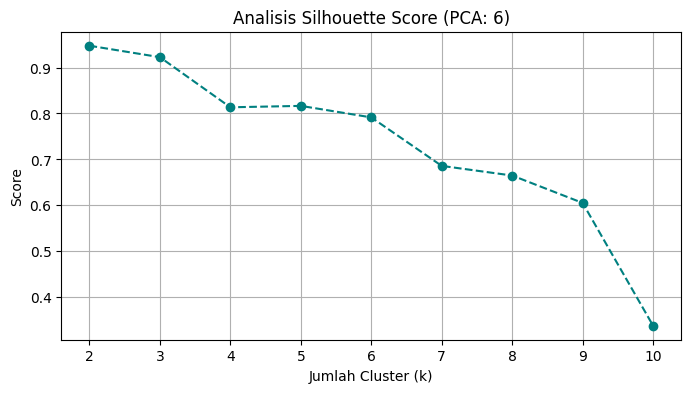

In [ ]:
pca_df_6 = run_pca_analysis(df_scaled, n_pca=6)

In [ ]:
# grafik k=2 terlihat paling optimal
final_model_6_2, score_6_2 = run_final_clustering(pca_df_6, k_final=2)

# mencoba k=3
final_model_6_3, score_6_3 = run_final_clustering(pca_df_6, k_final=3)

--- Evaluasi Model Akhir ---
Jumlah Cluster: 2
Silhouette Score: 0.9477

--- Evaluasi Model Akhir ---
Jumlah Cluster: 3
Silhouette Score: 0.9227



## PCA 7

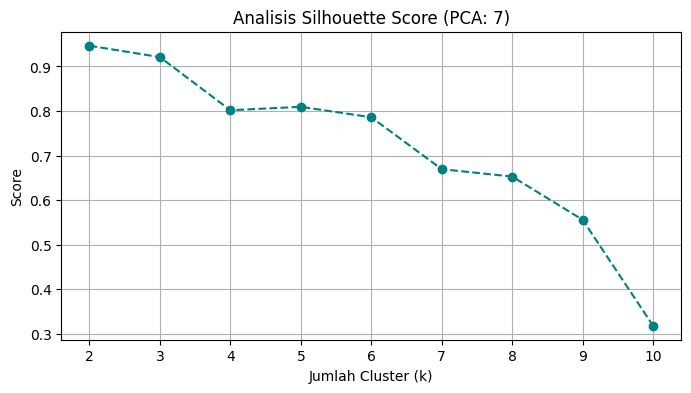

In [ ]:
pca_df_7 = run_pca_analysis(df_scaled, n_pca=7)

In [ ]:
# grafik k=2 terlihat paling optimal
final_model_7_2, score_7_2 = run_final_clustering(pca_df_7, k_final=2)

# mencoba k=3
final_model_7_3, score_7_3 = run_final_clustering(pca_df_7, k_final=3)

--- Evaluasi Model Akhir ---
Jumlah Cluster: 2
Silhouette Score: 0.9466

--- Evaluasi Model Akhir ---
Jumlah Cluster: 3
Silhouette Score: 0.9210



## PCA 8

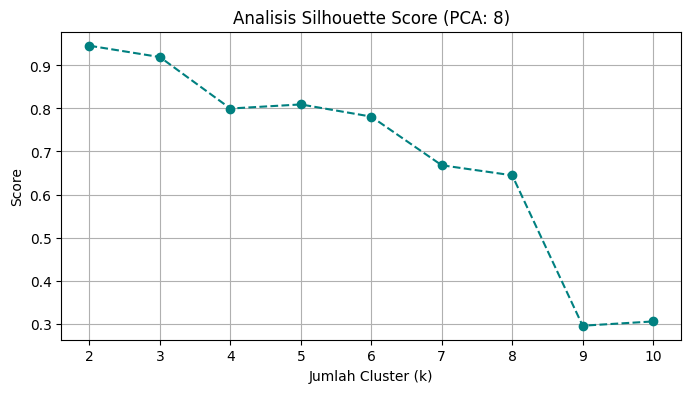

In [ ]:
pca_df_8 = run_pca_analysis(df_scaled, n_pca=8)

In [ ]:
# grafik k=2 terlihat paling optimal
final_model_8_2, score_8_2 = run_final_clustering(pca_df_8, k_final=2)

# mencoba k=3
final_model_8_3, score_8_3 = run_final_clustering(pca_df_8, k_final=3)

--- Evaluasi Model Akhir ---
Jumlah Cluster: 2
Silhouette Score: 0.9457

--- Evaluasi Model Akhir ---
Jumlah Cluster: 3
Silhouette Score: 0.9193



# 6. Evaluasi

Tabel Hasil Perbandingan Skenario Model (KP2):


,PCA Components,Clusters (k),Silhouette Score
0,5,2,0.949103
2,6,2,0.947652
4,7,2,0.946621
6,8,2,0.945703
1,5,3,0.925024
3,6,3,0.922694
5,7,3,0.921040
7,8,3,0.919329


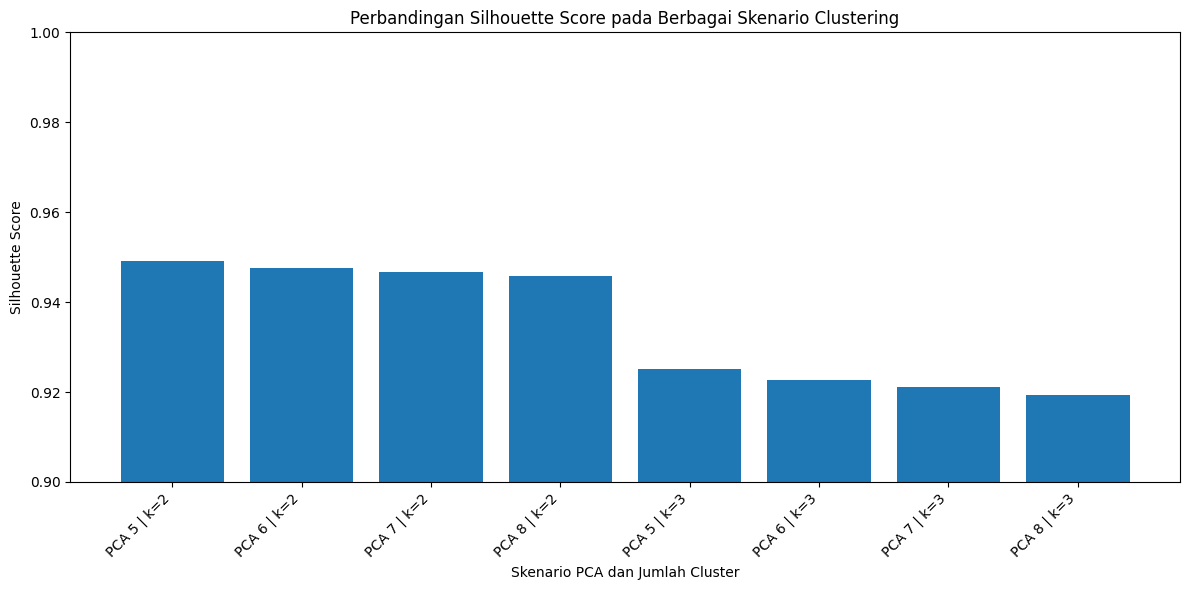

In [ ]:
# Menyusun data dari setiap score
data_skenario = {
    'PCA Components': [5, 5, 6, 6, 7, 7, 8, 8],
    'Clusters (k)': [2, 3, 2, 3, 2, 3, 2, 3],
    'Silhouette Score': [
        score_5_2, score_5_3,
        score_6_2, score_6_3,
        score_7_2, score_7_3,
        score_8_2, score_8_3
    ]
}

# Membuat DataFrame perbandingan
df_perbandingan = pd.DataFrame(data_skenario)

# Menampilkan tabel yang diurutkan dari skor tertinggi
df_perbandingan_sorted = df_perbandingan.sort_values(by='Silhouette Score', ascending=False)

print("Tabel Hasil Perbandingan Skenario Model (KP2):")
display(df_perbandingan_sorted)

# Pastikan data sudah diurutkan
df_plot = df_perbandingan_sorted.copy()

# Buat label skenario
df_plot['Skenario'] = (
    'PCA ' + df_plot['PCA Components'].astype(str) +
    ' | k=' + df_plot['Clusters (k)'].astype(str)
)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_plot['Skenario'], df_plot['Silhouette Score'])
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Skenario PCA dan Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette Score pada Berbagai Skenario Clustering')

plt.tight_layout()
plt.show()

# 7. Implementasi Model Terbaik

In [ ]:
# 1. Mengambil hanya kolom 'Cluster' dari hasil model PCA 5
# gunakan double bracket [['Cluster']] agar tetap dalam format DataFrame
df_labels = final_model_5_2[['Cluster']]

# 2. Menyatukan dengan df_scaled (data numerik hasil scaling)
# Gunakan axis=1 untuk menggabungkan secara horizontal (menambah kolom)
# Pastikan index keduanya masih sama (tidak di-reset secara berbeda sebelumnya)
df_scaled_with_cluster = pd.concat([df_scaled, df_labels], axis=1)

# 3. Menampilkan hasil penggabungan
print("Dataframe numerik terskala dengan label Cluster:")
display(df_scaled_with_cluster.head())

Dataframe numerik terskala dengan label Cluster:


,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate (%),Case Recovered Rate (%),Growth Factor of New Cases,Growth Factor of New Deaths,Cluster
0,-0.719510,0.0,-0.914562,0.054054,-2.663624,-1.304218,-2.198342,-0.313785,0.747669,-0.732888,-3.227290,0.0,-1.960239,5.280898,3.201506,0.028325,0.000000,1
1,-0.719510,0.0,-0.914562,0.054054,-2.644436,-1.304218,-2.198342,-0.312924,0.747669,-0.732888,-3.210916,0.0,-1.960239,5.186567,2.985697,0.028325,0.000000,1
2,-1.045105,0.0,-0.914562,0.000000,-3.919354,-2.468691,-3.594515,-0.290541,0.288902,-0.797626,-3.854532,0.0,-2.460334,-2.616770,0.470719,-1.925185,0.000000,1
3,-0.719510,0.0,-0.914562,0.054054,-2.626102,-1.304218,-2.198342,-0.312063,0.747669,-0.732888,-3.194265,0.0,-1.960239,5.096533,2.779850,0.028325,0.000000,1
4,-0.839677,0.0,-0.914562,0.027027,-3.752118,-2.203575,-2.282728,-0.315937,1.876379,-0.789881,-3.902903,0.0,-2.450847,5.329834,15.921414,0.028325,-3.843908,1


In [ ]:
# 1. Identifikasi kolom mana saja yang benar-benar di-Log sebelumnya
# Kita ambil kolom numerik yang TIDAK memiliki nilai negatif dari data awal
cols_logged = [col for col in data_covid.select_dtypes(include=[np.number]).columns
               if not (data_covid[col] < 0).any()]

# A. Pisahkan kolom Cluster
clusters = df_scaled_with_cluster['Cluster']
df_only_scaled = df_scaled_with_cluster.drop('Cluster', axis=1)

# B. Langkah 1: Inverse Robust Scaling (Untuk semua kolom)
data_inv_scaled = scaler.inverse_transform(df_only_scaled)
df_inv_scaled = pd.DataFrame(data_inv_scaled, columns=df_only_scaled.columns)

# C. Langkah 2: Inverse Log Transformation SELEKTIF
df_original_scale = df_inv_scaled.copy()

for col in df_original_scale.columns:
    if col in cols_logged:
        # Hanya kolom yang di-log yang dibalikkan dengan expm1
        df_original_scale[col] = np.expm1(df_original_scale[col])
    else:
        # Kolom yang mengandung nilai negatif (seperti Active Cases) dibiarkan apa adanya
        # karena sebelumnya memang tidak di-log
        df_original_scale[col] = df_original_scale[col]

# D. Gabungkan kembali dengan Metadata dan Cluster
df_final_original = pd.concat([
    df_metadata.reset_index(drop=True),
    df_original_scale,
    clusters.reset_index(drop=True)
], axis=1)

# E. Konversi ke Integer (Nullable) agar angka 2.0 menjadi 2
# Tangani juga jika ada nilai infinity (inf) akibat perhitungan matematik
cols_to_fix = df_original_scale.columns
df_final_original[cols_to_fix] = df_final_original[cols_to_fix].replace([np.inf, -np.inf], np.nan)
df_final_original[cols_to_fix] = df_final_original[cols_to_fix].round().astype('Int64')

display(df_final_original.head())

,Province,Island,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate (%),Case Recovered Rate (%),Growth Factor of New Cases,Growth Factor of New Deaths,Cluster
0,DKI Jakarta,Jawa,2,0,0,2,41,20,75,-54,10846145,0,4,0,2,49,183,1,1,1
1,DKI Jakarta,Jawa,2,0,0,2,43,20,75,-52,10846145,0,4,0,2,47,174,1,1,1
2,Riau,Sumatera,0,0,0,0,1,0,1,0,6074100,0,0,0,0,0,100,0,1,1
3,DKI Jakarta,Jawa,2,0,0,2,45,20,75,-50,10846145,0,4,0,2,44,167,1,1,1
4,Jawa Barat,Jawa,1,0,0,1,2,1,60,-59,45161325,0,0,0,0,50,3000,1,0,1


# 8. Profilling


In [ ]:
covid_cluster = pd.read_csv("covid_cluster.csv")

In [ ]:
# Menghitung rata-rata kasus asli untuk setiap Cluster
cluster_profile = covid_cluster.groupby('Cluster').mean(numeric_only=True)

# Menghitung jumlah provinsi (count) yang masuk ke setiap cluster
cluster_profile['Jumlah_Provinsi'] = covid_cluster.groupby('Cluster')['Province'].count()

# Menampilkan tabel profiling (diurutkan berdasarkan kasus tertinggi)
print("--- Profil Karakteristik Zona Risiko (Nilai Asli) ---")
display(cluster_profile.sort_values(by='Total Cases', ascending=False))

--- Profil Karakteristik Zona Risiko (Nilai Asli) ---


,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate (%),Case Recovered Rate (%),Growth Factor of New Cases,Growth Factor of New Deaths,Jumlah_Provinsi
Cluster,,,,,,,,,,,,,,,,,,
0,4553.076923,87.584615,11550.200000,-7084.707692,750463.261538,11764.892308,676745.076923,61953.292308,2.527825e+07,314.230769,44251.015385,5.769231,662.892308,1.492308,89.307692,1.138462,3.215385,65
1,234.817530,5.850534,209.909087,19.057909,87773.323715,2552.219182,81988.976345,3232.128189,8.427576e+06,31.193230,11899.412533,0.660447,299.957485,3.780858,86.148862,1.296756,1.021277,24815


In [ ]:
print(cluster_profile)

           New Cases  New Deaths  New Recovered  New Active Cases  \
Cluster                                                             
0        4553.076923   87.584615   11550.200000      -7084.707692   
1         234.817530    5.850534     209.909087         19.057909   

           Total Cases  Total Deaths  Total Recovered  Total Active Cases  \
Cluster                                                                     
0        750463.261538  11764.892308    676745.076923        61953.292308   
1         87773.323715   2552.219182     81988.976345         3232.128189   

           Population  New Cases per Million  Total Cases per Million  \
Cluster                                                                 
0        2.527825e+07             314.230769             44251.015385   
1        8.427576e+06              31.193230             11899.412533   

         New Deaths per Million  Total Deaths per Million  \
Cluster                                                     

# SAVE

In [ ]:
# df_final_original.to_csv('covid_cluster.csv', index=False)